In [88]:
threads = 16
import os
os.environ["MKL_NUM_THREADS"] = str(threads)
os.environ["NUMEXPR_NUM_THREADS"] = str(threads)
os.environ["OMP_NUM_THREADS"] = str(threads)


import Functions as fn
import numpy as np
import CRUMPET
import matplotlib.pyplot as plt
import fc_mapping as fc
import scipy.interpolate as interpolate
import scipy.integrate as integrate

In [89]:
#default Eirene setup with Eirene rates
fn.gen_input('input_Eirene.dat', vibr_hyd=True, incl_ground=False, diss_hyd=True,diss_ion=False,mol_cx_hyd=True,ion_hyd=True,MA=False,MolIonR=True)
crm_Eirene = CRUMPET.Crumpet('input_Eirene.dat')

['H2VIBR_OR', 'H.2', '2.0v1']
['H2VIBR_OR', 'H.2', '2.1v0']
['H2VIBR_OR', 'H.2', '2.1v2']
['H2VIBR_OR', 'H.2', '2.2v1']
['H2VIBR_OR', 'H.2', '2.2v3']
['H2VIBR_OR', 'H.2', '2.3v2']
['H2VIBR_OR', 'H.2', '2.3v4']
['H2VIBR_OR', 'H.2', '2.4v3']
['H2VIBR_OR', 'H.2', '2.4v5']
['H2VIBR_OR', 'H.2', '2.5v4']
['H2VIBR_OR', 'H.2', '2.5v6']
['H2VIBR_OR', 'H.2', '2.6v5']
['H2VIBR_OR', 'H.2', '2.6v7']
['H2VIBR_OR', 'H.2', '2.7v6']
['H2VIBR_OR', 'H.2', '2.7v8']
['H2VIBR_OR', 'H.2', '2.8v7']
['H2VIBR_OR', 'H.2', '2.8v9']
['H2VIBR_OR', 'H.2', '2.9v8']
['H2VIBR_OR', 'H.2', '2.9v10']
['H2VIBR_OR', 'H.2', '2.10v9']
['H2VIBR_OR', 'H.2', '2.10v11']
['H2VIBR_OR', 'H.2', '2.11v10']
['H2VIBR_OR', 'H.2', '2.11v12']
['H2VIBR_OR', 'H.2', '2.12v11']
['H2VIBR_OR', 'H.2', '2.12v13']
['H2VIBR_OR', 'H.2', '2.13v12']
['H2VIBR_OR', 'H.2', '2.13v14']
['H2VIBR_OR', 'H.2', '2.14v13']
['H2VIBR_OR', 'H.2', '2.0l2']
['H2VIBR_OR', 'H.2', '2.1l2']
['H2VIBR_OR', 'H.2', '2.2l2']
['H2VIBR_OR', 'H.2', '2.3l2']
['H2VIBR_OR', 'H.2', '

100%|██████████| 14/14 [00:00<00:00, 19724.64it/s]


Constructing functional emissivity matrix


100%|██████████| 14/14 [00:00<00:00, 26960.63it/s]


Constructing functional energy transfer matrix


100%|██████████| 14/14 [00:00<00:00, 26874.26it/s]


In [90]:
#setup with Eirene rates and Ichihara molecular CX as well as H- (Laporta)
fn.gen_input('input_Eirene_MolCXIchi_HminLaporta.dat', vibr_hyd=True, incl_ground=False, diss_hyd=True,diss_ion=False,mol_cx=True,ion_hyd=True,diss_att_X1=True,MA=False,MA_min=False,MolIonR=True)
crm_Eirene_MolCXIchi_HminLaporta = CRUMPET.Crumpet('input_Eirene_MolCXIchi_HminLaporta.dat')

['H2VIBR_OR', 'H.2', '2.0v1']
['H2VIBR_OR', 'H.2', '2.1v0']
['H2VIBR_OR', 'H.2', '2.1v2']
['H2VIBR_OR', 'H.2', '2.2v1']
['H2VIBR_OR', 'H.2', '2.2v3']
['H2VIBR_OR', 'H.2', '2.3v2']
['H2VIBR_OR', 'H.2', '2.3v4']
['H2VIBR_OR', 'H.2', '2.4v3']
['H2VIBR_OR', 'H.2', '2.4v5']
['H2VIBR_OR', 'H.2', '2.5v4']
['H2VIBR_OR', 'H.2', '2.5v6']
['H2VIBR_OR', 'H.2', '2.6v5']
['H2VIBR_OR', 'H.2', '2.6v7']
['H2VIBR_OR', 'H.2', '2.7v6']
['H2VIBR_OR', 'H.2', '2.7v8']
['H2VIBR_OR', 'H.2', '2.8v7']
['H2VIBR_OR', 'H.2', '2.8v9']
['H2VIBR_OR', 'H.2', '2.9v8']
['H2VIBR_OR', 'H.2', '2.9v10']
['H2VIBR_OR', 'H.2', '2.10v9']
['H2VIBR_OR', 'H.2', '2.10v11']
['H2VIBR_OR', 'H.2', '2.11v10']
['H2VIBR_OR', 'H.2', '2.11v12']
['H2VIBR_OR', 'H.2', '2.12v11']
['H2VIBR_OR', 'H.2', '2.12v13']
['H2VIBR_OR', 'H.2', '2.13v12']
['H2VIBR_OR', 'H.2', '2.13v14']
['H2VIBR_OR', 'H.2', '2.14v13']
['H2VIBR', 'H.2', '2.0q6']
['H2VIBR', 'H.2', '2.1q6']
['H2VIBR', 'H.2', '2.2q6']
['H2VIBR', 'H.2', '2.3q6']
['H2VIBR', 'H.2', '2.4q6']
['H2VIB

100%|██████████| 14/14 [00:00<00:00, 17434.76it/s]


Constructing functional emissivity matrix


100%|██████████| 14/14 [00:00<00:00, 22654.42it/s]


Constructing functional energy transfer matrix


100%|██████████| 14/14 [00:00<00:00, 21306.33it/s]


In [91]:
fn.gen_input('input_ElecExc.dat', vibr_hyd=True, incl_ground=False, diss_hyd=True,diss_ion=False,mol_cx=True,ion_hyd=True,diss_att_X1=True,MA=False,MA_min=False,MolIonR=True,B1=True,C1=True,vibr_resolved=False)
crm_Kobussen = CRUMPET.Crumpet('input_ElecExc.dat')

['H2VIBR_OR', 'H.2', '2.0v1']
['H2VIBR_OR', 'H.2', '2.1v0']
['H2VIBR_OR', 'H.2', '2.1v2']
['H2VIBR_OR', 'H.2', '2.2v1']
['H2VIBR_OR', 'H.2', '2.2v3']
['H2VIBR_OR', 'H.2', '2.3v2']
['H2VIBR_OR', 'H.2', '2.3v4']
['H2VIBR_OR', 'H.2', '2.4v3']
['H2VIBR_OR', 'H.2', '2.4v5']
['H2VIBR_OR', 'H.2', '2.5v4']
['H2VIBR_OR', 'H.2', '2.5v6']
['H2VIBR_OR', 'H.2', '2.6v5']
['H2VIBR_OR', 'H.2', '2.6v7']
['H2VIBR_OR', 'H.2', '2.7v6']
['H2VIBR_OR', 'H.2', '2.7v8']
['H2VIBR_OR', 'H.2', '2.8v7']
['H2VIBR_OR', 'H.2', '2.8v9']
['H2VIBR_OR', 'H.2', '2.9v8']
['H2VIBR_OR', 'H.2', '2.9v10']
['H2VIBR_OR', 'H.2', '2.10v9']
['H2VIBR_OR', 'H.2', '2.10v11']
['H2VIBR_OR', 'H.2', '2.11v10']
['H2VIBR_OR', 'H.2', '2.11v12']
['H2VIBR_OR', 'H.2', '2.12v11']
['H2VIBR_OR', 'H.2', '2.12v13']
['H2VIBR_OR', 'H.2', '2.13v12']
['H2VIBR_OR', 'H.2', '2.13v14']
['H2VIBR_OR', 'H.2', '2.14v13']
['H2VIBR', 'H.2', '2.0q6']
['H2VIBR', 'H.2', '2.1q6']
['H2VIBR', 'H.2', '2.2q6']
['H2VIBR', 'H.2', '2.3q6']
['H2VIBR', 'H.2', '2.4q6']
['H2VIB

100%|██████████| 18/18 [00:00<00:00, 7731.44it/s]


Constructing functional emissivity matrix


100%|██████████| 18/18 [00:00<00:00, 8423.24it/s]


Constructing functional energy transfer matrix


100%|██████████| 18/18 [00:00<00:00, 8995.29it/s]


In [92]:
Te_reso = 100
Tev = 10**np.linspace(np.log10(0.05), np.log10(6), Te_reso)
iso_mass=2
Tiv = Tev/2
ne = 1e19

fv_H2_MolCXIchi = np.ones([15,len(Tev)])
for i in range(0,len(Tev)):
    fv_H2_MolCXIchi[1:,i]=crm_Eirene_MolCXIchi_HminLaporta.steady_state(Tev[i],ne*1e-6,Ti=Tiv[i], plot=False,dt=True)[0:14]

fv_H2 = np.ones([15,len(Tev)])
for i in range(0,len(Tev)):
    fv_H2[1:,i]=crm_Eirene.steady_state(Tev[i],ne*1e-6,Ti=Tiv[i], plot=False,dt=True)[0:14]

fv_H2_K = np.ones([15,len(Tev)])
for i in range(0,len(Tev)):
    fv_H2_K[1:,i]=crm_Kobussen.steady_state(Tev[i],ne*1e-6,Ti=Tiv[i], plot=False,dt=True)[0:14]


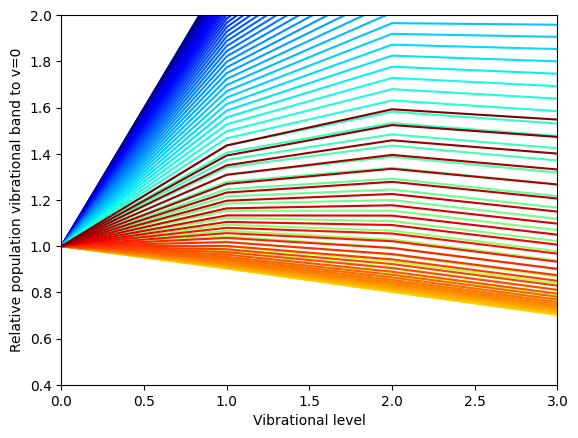

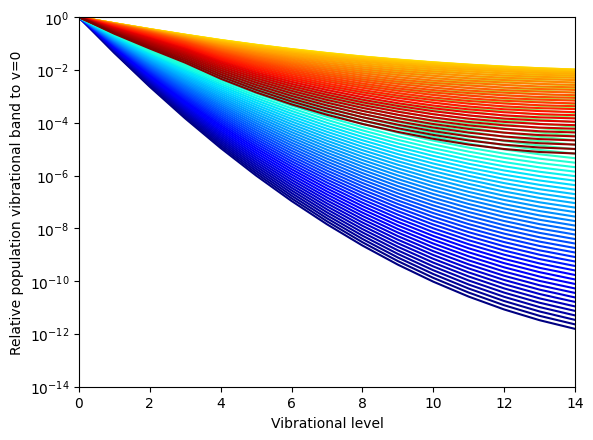

In [93]:
#Show evolution of vibrational distribution after Fulcher mapping

def get_upper(ground=None, T=5000, FC_table_name =  'FCFs_2004_Fantz.npy',DE=np.array([0, 0.19652, 0.56765, 0.92411, 1.26620, 1.59408, 1.90780, 2.20734, 2.49267, 2.76373, 3.02042, 3.26256, 3.48988, 3.70193, 3.89810, 4.07762, 4.23957, 4.38257, 4.50504, 4.60581, 4.68166, 4.72989])*11606):
    #courtesy of Nick Osborne
    def vibr_boltzmann(T,DE=np.array([0, 4303, 8436, 12402, 16204, 19841, 23314, 26622, 29765, 32785, 35548, 38184, 40642, 42917, 44998, 46876, 48533, 49953, 51122, 52001, 52560])):
        return np.exp(-DE/(T))

    import os

    # load Frank-Condon factor table for D2
    FC_table = np.load(FC_table_name, allow_pickle=True)
    FC_sums = np.sum(FC_table, axis=1)

    #get ground state distribution
    if type(ground)==type(None):
        ground = vibr_boltzmann(T,DE=DE)

    n_ground = len(ground)

    if n_ground>20:
        n_ground=20

    upper = np.zeros((n_ground))

    # map upwards via FC table and normalise:
    for i in range(0, n_ground):
        upper[i] = sum([ground[j] * FC_table[i][j]/FC_sums[i] for j in range(0, n_ground)])

    return upper/upper[0]

fv_Fulcher = np.zeros(np.shape(fv_H2))

for i in range(0,np.shape(fv_H2)[1]):
    fv_Fulcher[:,i] = get_upper(ground=fv_H2[:15,i])
    
plt.figure()
TeMax =5
TeMin = 0.05
N = sum(np.logical_and(Tev<TeMax,Tev>TeMin))
col = plt.cm.jet(np.linspace(0,1,N))
looper=0
V=np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin))
for i in np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin)):
    plt.plot(fv_Fulcher[:,i]/fv_Fulcher[0,i],'-',color=col[looper])
    looper+=1

#Tfind = 1.1
#i = np.argmin(np.abs(Tev-Tfind))
#plt.plot(fv_Fulcher[:,i]/fv_Fulcher[0,i],'-',color=col[i],linewidth=10)

plt.axis([0,3,0.4,2])
plt.xlabel('Vibrational level')
plt.ylabel('Relative population vibrational band to v=0')
plt.savefig('VibrDistr_Eirene_d3Pu.eps')

plt.figure()
TeMax = 5
TeMin = 0.05
N = sum(np.logical_and(Tev<TeMax,Tev>TeMin))
col = plt.cm.jet(np.linspace(0,1,N))
looper=0
V=np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin))
for i in np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin)):
    plt.semilogy(fv_H2[:,i]/fv_H2[0,i],'-',color=col[looper])
    looper+=1

#Tfind = 1.1
#i = np.argmin(np.abs(Tev-Tfind))
#plt.semilogy(fv_H2[:,i]/fv_H2[0,i],'-',color=col[i],linewidth=10)

#plt.axis([0,3,0.4,2])
plt.xlabel('Vibrational level')
plt.ylabel('Relative population vibrational band to v=0')
plt.axis([0,14,10**-14,1])
plt.savefig('VibrDistr_Eirene_X1Sg.eps')


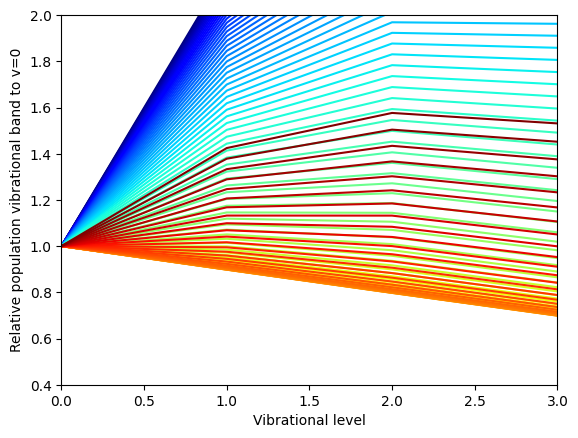

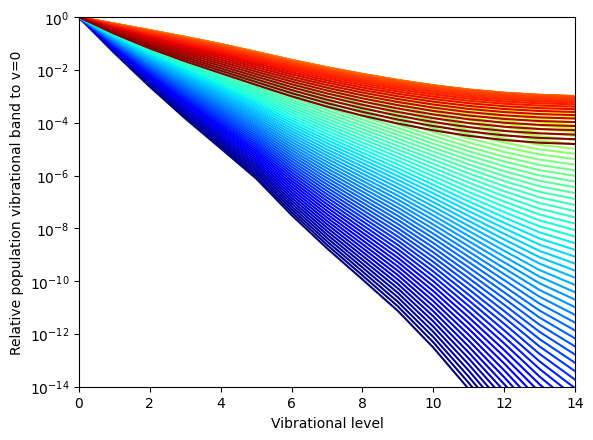

In [94]:
#Show evolution of vibrational distribution after Fulcher mapping

fv_Fulcher = np.zeros(np.shape(fv_H2_MolCXIchi))

for i in range(0,np.shape(fv_H2_MolCXIchi)[1]):
    fv_Fulcher[:,i] = get_upper(ground=fv_H2_MolCXIchi[:15,i])
    
plt.figure()
TeMax =5
TeMin = 0.05
N = sum(np.logical_and(Tev<TeMax,Tev>TeMin))
col = plt.cm.jet(np.linspace(0,1,N))
looper=0
V=np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin))
for i in np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin)):
    plt.plot(fv_Fulcher[:,i]/fv_Fulcher[0,i],'-',color=col[looper])
    looper+=1

#Tfind = 1.1
#i = np.argmin(np.abs(Tev-Tfind))
#plt.plot(fv_Fulcher[:,i]/fv_Fulcher[0,i],'-',color=col[i],linewidth=10)

plt.axis([0,3,0.4,2])
plt.xlabel('Vibrational level')
plt.ylabel('Relative population vibrational band to v=0')
plt.savefig('VibrDistr_EireneMolCX_d3Pu.eps')

plt.figure()
TeMax = 5
TeMin = 0.05
N = sum(np.logical_and(Tev<TeMax,Tev>TeMin))
col = plt.cm.jet(np.linspace(0,1,N))
looper=0
V=np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin))
for i in np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin)):
    plt.semilogy(fv_H2_MolCXIchi[:,i]/fv_H2_MolCXIchi[0,i],'-',color=col[looper])
    looper+=1

#Tfind = 1.1
#i = np.argmin(np.abs(Tev-Tfind))
#plt.semilogy(fv_H2[:,i]/fv_H2[0,i],'-',color=col[i],linewidth=10)

#plt.axis([0,3,0.4,2])
plt.xlabel('Vibrational level')
plt.ylabel('Relative population vibrational band to v=0')
plt.axis([0,14,10**-14,1])
plt.savefig('VibrDistr_EireneMolCX_X1Sg.eps')


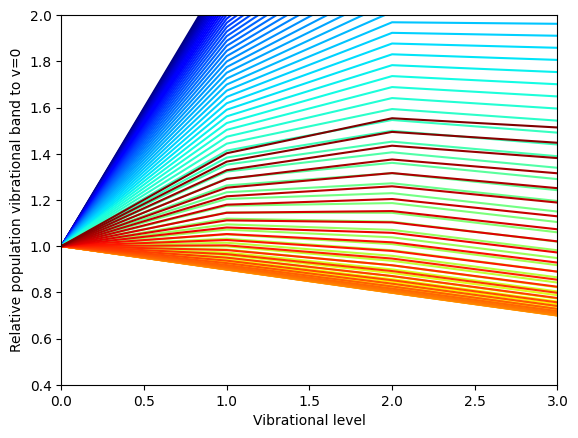

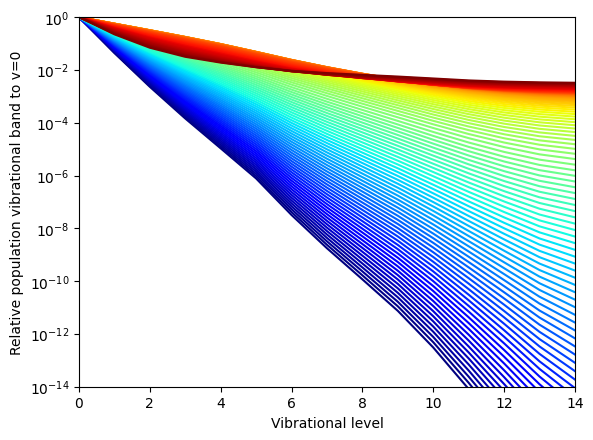

In [95]:
#Show evolution of vibrational distribution after Fulcher mapping

fv_Fulcher = np.zeros(np.shape(fv_H2_K))

for i in range(0,np.shape(fv_H2_K)[1]):
    fv_Fulcher[:,i] = get_upper(ground=fv_H2_K[:15,i])
    
plt.figure()
TeMax =5
TeMin = 0.05
N = sum(np.logical_and(Tev<TeMax,Tev>TeMin))
col = plt.cm.jet(np.linspace(0,1,N))
looper=0
V=np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin))
for i in np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin)):
    plt.plot(fv_Fulcher[:,i]/fv_Fulcher[0,i],'-',color=col[looper])
    looper+=1

#Tfind = 1.1
#i = np.argmin(np.abs(Tev-Tfind))
#plt.plot(fv_Fulcher[:,i]/fv_Fulcher[0,i],'-',color=col[i],linewidth=10)

plt.axis([0,3,0.4,2])
plt.xlabel('Vibrational level')
plt.ylabel('Relative population vibrational band to v=0')
plt.savefig('VibrDistr_Kobussen_d3Pu.eps')

plt.figure()
TeMax = 5
TeMin = 0.05
N = sum(np.logical_and(Tev<TeMax,Tev>TeMin))
col = plt.cm.jet(np.linspace(0,1,N))
looper=0
V=np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin))
for i in np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin)):
    plt.semilogy(fv_H2_K[:,i]/fv_H2_K[0,i],'-',color=col[looper])
    looper+=1

#Tfind = 1.1
#i = np.argmin(np.abs(Tev-Tfind))
#plt.semilogy(fv_H2[:,i]/fv_H2[0,i],'-',color=col[i],linewidth=10)

#plt.axis([0,3,0.4,2])
plt.xlabel('Vibrational level')
plt.ylabel('Relative population vibrational band to v=0')
plt.axis([0,14,10**-14,1])
plt.savefig('VibrDistr_Kobussen_X1Sg.eps')

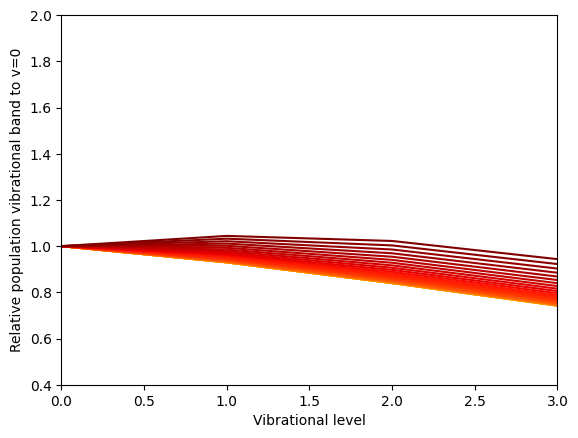

In [96]:
# Add in transport into CRM

Te_ori = 1
fv_H2=crm_Eirene_MolCXIchi_HminLaporta.steady_state(Te_ori,ne*1e-6,Ti=Te_ori/2, plot=False,dt=True)[0:14]

Te_reso = 100
Tev = 10**np.linspace(np.log10(0.1), np.log10(5), Te_reso)
iso_mass=2
Tiv = Tev/2
ne = 1e19
tau = 1e-5

fv_tau_H2 = np.ones([15,len(Tev)])
for i in range(0,len(Tev)):
    fv_tau_H2[1:,i] = crm_Eirene_MolCXIchi_HminLaporta.solve_crm(tau,Tev[i],ne*1e-6,Ti=Tiv[i], gl=False,densonly=True,n=fv_H2).y[0:14,-1]
    
def get_upper(ground=None, T=5000, FC_table_name =  'FCFs_2004_Fantz.npy',DE=np.array([0, 0.19652, 0.56765, 0.92411, 1.26620, 1.59408, 1.90780, 2.20734, 2.49267, 2.76373, 3.02042, 3.26256, 3.48988, 3.70193, 3.89810, 4.07762, 4.23957, 4.38257, 4.50504, 4.60581, 4.68166, 4.72989])*11606):
    #courtesy of Nick Osborne
    def vibr_boltzmann(T,DE=np.array([0, 4303, 8436, 12402, 16204, 19841, 23314, 26622, 29765, 32785, 35548, 38184, 40642, 42917, 44998, 46876, 48533, 49953, 51122, 52001, 52560])):
        return np.exp(-DE/(T))

    import os

    # load Frank-Condon factor table for D2
    FC_table = np.load(FC_table_name, allow_pickle=True)
    FC_sums = np.sum(FC_table, axis=1)

    #get ground state distribution
    if type(ground)==type(None):
        ground = vibr_boltzmann(T,DE=DE)

    n_ground = len(ground)

    if n_ground>20:
        n_ground=20

    upper = np.zeros((n_ground))

    # map upwards via FC table and normalise:
    for i in range(0, n_ground):
        upper[i] = sum([ground[j] * FC_table[i][j]/FC_sums[i] for j in range(0, n_ground)])

    return upper/upper[0]

fv_Fulcher = np.zeros(np.shape(fv_tau_H2))

for i in range(0,np.shape(fv_tau_H2)[1]):
    fv_Fulcher[:,i] = get_upper(ground=fv_tau_H2[:15,i])
    
plt.figure()
TeMax = 5
TeMin = 0.1
N = sum(np.logical_and(Tev<TeMax,Tev>TeMin))
col = plt.cm.jet(np.linspace(0,1,N))
looper=0
V=np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin))
for i in np.argwhere(np.logical_and(Tev<TeMax,Tev>TeMin)):
    plt.plot(fv_Fulcher[:,i]/fv_Fulcher[0,i],'-',color=col[looper])
    looper+=1
plt.axis([0,3,0.4,2])
plt.xlabel('Vibrational level')
plt.ylabel('Relative population vibrational band to v=0')
plt.savefig('VibrDistr_Eirene_Transp.eps')

